In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.float_format = "{:.2f}".format

## Get the Data and Showing the Tables

In [20]:
transactions = pd.read_csv('https://raw.githubusercontent.com/tuhinhussain1995/PROJECT-Data-Analysis-Sales-Insights-PowerBI/refs/heads/master/transactions.csv')

In [22]:
transactions.head(5)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR
1,Prod001,Cus002,Mark002,2018-05-08,3,-1.00,INR
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR
3,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.00,INR


In [25]:
products = pd.read_csv('https://raw.githubusercontent.com/tuhinhussain1995/PROJECT-Data-Analysis-Sales-Insights-PowerBI/refs/heads/master/products.csv')

In [28]:
products.sample(5)

,product_code,product_type
135,Prod136,Own Brand
73,Prod074,Distribution
207,Prod208,Own Brand
196,Prod197,Own Brand
169,Prod170,Own Brand


In [29]:
markets = pd.read_csv('https://raw.githubusercontent.com/tuhinhussain1995/PROJECT-Data-Analysis-Sales-Insights-PowerBI/refs/heads/master/markets.csv')


In [30]:
markets.sample(5)

,markets_code,markets_name,zone
13,Mark014,Hyderabad,South
3,Mark004,Delhi NCR,North
8,Mark009,Patna,North
6,Mark007,Bhopal,Central
9,Mark010,Kochi,South


In [31]:
customers = pd.read_csv('https://raw.githubusercontent.com/tuhinhussain1995/PROJECT-Data-Analysis-Sales-Insights-PowerBI/refs/heads/master/customers.csv')

In [32]:
customers.sample(5)

,customer_code,custmer_name,customer_type
29,Cus030,Synthetic,E-Commerce
1,Cus002,Nomad Stores,Brick & Mortar
27,Cus028,Sage,E-Commerce
30,Cus031,Zone,E-Commerce
18,Cus019,Electricalsopedia Stores,Brick & Mortar


In [33]:
date = pd.read_csv('https://raw.githubusercontent.com/tuhinhussain1995/PROJECT-Data-Analysis-Sales-Insights-PowerBI/refs/heads/master/date.csv')


In [34]:
date.sample(5)

,date,cy_date,year,month_name,date_yy_mmm
1048,2020-04-14,2020-04-01,2020,April,20-Apr
339,2018-05-06,2018-05-01,2018,May,18-May
665,2019-03-28,2019-03-01,2019,March,19-Mar
530,2018-11-13,2018-11-01,2018,November,18-Nov
221,2018-01-08,2018-01-01,2018,January,18-Jan


## Transactions

In [37]:
transactions.dtypes

product_code      object
customer_code     object
market_code       object
order_date        object
sales_qty          int64
sales_amount     float64
currency          object
dtype: object

## Check null values

In [38]:
transactions.isnull().sum()

product_code     0
customer_code    0
market_code      0
order_date       0
sales_qty        0
sales_amount     0
currency         0
dtype: int64

## Sales_amount bleow 1 

In [39]:
transactions[transactions['sales_amount'] <= 0].sample(3)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
54508,Prod159,Cus020,Mark006,2018-02-06,1,0.00,INR
17409,Prod065,Cus003,Mark006,2018-02-19,1,0.00,INR
54493,Prod159,Cus005,Mark006,2018-01-30,12,0.00,INR


In [40]:
len(transactions[transactions['sales_amount'] <= 0])

1611

In [41]:
transactions.shape

(150283, 7)

In [43]:
transactions.drop(transactions[transactions['sales_amount'] <= 0].index, inplace=True)

In [44]:
transactions.shape

(148672, 7)

## USD to INR Conversation 

In [45]:
transactions['currency'].unique()

array(['INR', 'USD'], dtype=object)

In [46]:
transactions[transactions['currency'] == 'USD']

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
5,Prod003,Cus005,Mark004,2017-11-20,59,500.00,USD
6,Prod003,Cus005,Mark004,2017-11-22,36,250.00,USD
286,Prod003,Cus005,Mark004,2017-11-20,59,500.00,USD
287,Prod003,Cus005,Mark004,2017-11-22,36,250.00,USD


In [47]:
transactions[transactions['currency'] == 'USD']['sales_amount']

5     500.00
6     250.00
286   500.00
287   250.00
Name: sales_amount, dtype: float64

In [48]:
val = transactions[transactions['currency'] == 'USD'].index

In [50]:
val

Index([5, 6, 286, 287], dtype='int64')

In [51]:
for x in val:
    transactions.at[x,'sales_amount'] = transactions.at[x,'sales_amount']*75
    transactions.at[x,'currency'] = 'INR'

In [52]:
transactions.loc[val]

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
5,Prod003,Cus005,Mark004,2017-11-20,59,37500.00,INR
6,Prod003,Cus005,Mark004,2017-11-22,36,18750.00,INR
286,Prod003,Cus005,Mark004,2017-11-20,59,37500.00,INR
287,Prod003,Cus005,Mark004,2017-11-22,36,18750.00,INR


## Adding column product_price 

In [53]:
transactions['product_price'] = transactions['sales_amount'] / transactions['sales_qty']

In [54]:
transactions.head(5)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00
3,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.00,INR,1196.00
5,Prod003,Cus005,Mark004,2017-11-20,59,37500.00,INR,635.59


In [55]:
transactions.isnull().sum()

product_code     0
customer_code    0
market_code      0
order_date       0
sales_qty        0
sales_amount     0
currency         0
product_price    0
dtype: int64

## Adding column original_price
original_price refers to product price without profit 

In [56]:
def calc_perc(y):
    profit = 8
    
    if y > 4000:
        profit = 23
    elif y > 3000:
        profit = 19
    elif y > 2000:
        profit = 17
    elif y > 1000:
        profit = 15
    elif y > 500:
        profit = 13
    elif y > 100:
        profit = 11
    else:
        profit = 8
        
    return profit    

In [57]:
transactions['profit_percentage'] = transactions['product_price'].apply(calc_perc)

In [58]:
transactions.head()

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00,13
3,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00,13
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.00,INR,1196.00,15
5,Prod003,Cus005,Mark004,2017-11-20,59,37500.00,INR,635.59,13


In [59]:
transactions.shape

(148672, 9)

In [60]:
transactions['profit_percentage'].isnull().sum()

0

In [61]:
transactions.isnull().sum()

product_code         0
customer_code        0
market_code          0
order_date           0
sales_qty            0
sales_amount         0
currency             0
product_price        0
profit_percentage    0
dtype: int64

In [62]:
transactions['original_price'] = (transactions['product_price'] - (transactions['product_price']*(transactions['profit_percentage'] / 100)))

In [63]:
transactions.head(5)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00,13,761.25
3,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00,13,507.21
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.00,INR,1196.00,15,1016.60
5,Prod003,Cus005,Mark004,2017-11-20,59,37500.00,INR,635.59,13,552.97


## Adding column profit

In [71]:
transactions['profit'] = transactions['product_price']*(transactions['profit_percentage'] / 100)

In [65]:
transactions.head(5)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,profit
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04,45.37
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00,13,761.25,113.75
3,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00,13,507.21,75.79
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.00,INR,1196.00,15,1016.60,179.40
5,Prod003,Cus005,Mark004,2017-11-20,59,37500.00,INR,635.59,13,552.97,82.63


## Adding Column total_profit

In [75]:
transactions['total_profit'] = (transactions['sales_qty'])*(transactions['product_price']*(transactions['profit_percentage'] / 100))

In [76]:
transactions.head(5)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,profit,total_profit
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04,45.37,4536.51
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00,13,761.25,113.75,113.75
3,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00,13,507.21,75.79,75.79
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.00,INR,1196.00,15,1016.60,179.40,1076.40
5,Prod003,Cus005,Mark004,2017-11-20,59,37500.00,INR,635.59,13,552.97,82.63,4875.00


## Adding column total_cost 

In [77]:
transactions['total_cost'] = (transactions['sales_amount'])-(transactions['total_profit'])

In [68]:
transactions.head(5)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,profit
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04,45.37
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00,13,761.25,113.75
3,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00,13,507.21,75.79
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.00,INR,1196.00,15,1016.60,179.40
5,Prod003,Cus005,Mark004,2017-11-20,59,37500.00,INR,635.59,13,552.97,82.63


## Verifying values

In [78]:
transactions['sales_amount'].sum()

np.float64(986676768.0)

In [79]:
transactions['total_cost'].sum()

np.float64(849375728.9)

In [80]:
transactions['total_profit'].sum()

np.float64(137301039.1)

In [81]:
(transactions['total_cost'].sum() + transactions['total_profit'].sum()) - transactions['sales_amount'].sum()

np.float64(0.0)

In [82]:
transactions.shape

(148672, 13)

## Products

In [83]:
products.head(5)

,product_code,product_type
0,Prod001,Own Brand
1,Prod002,Own Brand
2,Prod003,Own Brand
3,Prod004,Own Brand
4,Prod005,Own Brand


In [84]:
products['product_type'].unique()

array(['Own Brand', 'Distribution'], dtype=object)

In [85]:
products['product_code'].nunique()

279

In [86]:
len(products[products['product_type'] == 'Own Brand'])

191

In [87]:
len(products[products['product_type'] == 'Distribution'])

88

In [88]:
transactions['product_code'].nunique()

338

In [89]:
prod_code1 = pd.Series(products['product_code'].unique())

In [90]:
prod_code2 = pd.Series(transactions['product_code'].unique())

In [91]:
prod_code1.tail()

274    Prod275
275    Prod276
276    Prod277
277    Prod278
278    Prod279
dtype: object

In [92]:
prod_code2.tail()

333    Prod335
334    Prod336
335    Prod337
336    Prod338
337    Prod339
dtype: object

In [103]:
for x in range(279, 338, 1):
    new_row = pd.DataFrame([{'product_code':prod_code2[x],'product_type':'own brand'}])
    products = pd.concat([products,new_row],ignore_index=True)

In [104]:
products['product_code'].nunique()

338

In [105]:
products.tail()

,product_code,product_type
333,Prod335,own brand
334,Prod336,own brand
335,Prod337,own brand
336,Prod338,own brand
337,Prod339,own brand


In [106]:
transactions.shape

(148672, 13)

In [107]:
transactions2 = pd.merge(transactions, products, how='inner', on='product_code')

In [109]:
transactions2.sample(5)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,profit,total_profit,total_cost,product_type
21487,Prod090,Cus001,Mark010,2019-02-27,33,2014.00,INR,61.03,8,56.15,4.88,161.12,1852.88,Own Brand
16849,Prod065,Cus017,Mark007,2017-10-17,32,3866.00,INR,120.81,11,107.52,13.29,425.26,3440.74,Own Brand
83284,Prod269,Cus021,Mark011,2020-03-12,1,102.00,INR,102.00,11,90.78,11.22,11.22,90.78,Own Brand
72090,Prod252,Cus006,Mark004,2018-06-20,50,13056.00,INR,261.12,11,232.40,28.72,1436.16,11619.84,Distribution
14851,Prod060,Cus003,Mark003,2018-05-04,85,36421.00,INR,428.48,11,381.35,47.13,4006.31,32414.69,Own Brand


In [110]:
transactions2.shape

(148672, 14)

## Customers 

In [111]:
customers.head(5)

,customer_code,custmer_name,customer_type
0,Cus001,Surge Stores,Brick & Mortar
1,Cus002,Nomad Stores,Brick & Mortar
2,Cus003,Excel Stores,Brick & Mortar
3,Cus004,Surface Stores,Brick & Mortar
4,Cus005,Premium Stores,Brick & Mortar


In [112]:
customers['customer_type'].unique()

array(['Brick & Mortar', 'E-Commerce'], dtype=object)

In [113]:
customers['customer_type'].nunique()

2

In [114]:
customers['customer_code'].nunique()

38

In [115]:
transactions2.shape

(148672, 14)

In [116]:
transactions3 = pd.merge(transactions2, customers, how='inner', on='customer_code')

In [117]:
transactions3.sample(5)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,profit,total_profit,total_cost,product_type,custmer_name,customer_type
134931,Prod318,Cus003,Mark003,2018-08-31,2,2657.00,INR,1328.50,15,1129.22,199.28,398.55,2258.45,own brand,Excel Stores,Brick & Mortar
76663,Prod263,Cus020,Mark011,2019-04-04,1,69.00,INR,69.00,8,63.48,5.52,5.52,63.48,Distribution,Nixon,E-Commerce
104209,Prod288,Cus007,Mark004,2018-06-11,1,106.00,INR,106.00,11,94.34,11.66,11.66,94.34,own brand,Info Stores,Brick & Mortar
10716,Prod054,Cus015,Mark007,2020-06-12,3,903.00,INR,301.00,11,267.89,33.11,99.33,803.67,Own Brand,Electricalsbea Stores,Brick & Mortar
147657,Prod337,Cus035,Mark007,2020-01-09,1,731.00,INR,731.00,13,635.97,95.03,95.03,635.97,own brand,Relief,E-Commerce


In [118]:
transactions3.shape

(148672, 16)

## Markets 

In [119]:
markets.columns

Index(['markets_code', 'markets_name', 'zone'], dtype='object')

In [120]:
markets = markets.rename(columns={"markets_code": "market_code", "markets_name": "market_name"})

In [122]:
markets.head(5)

,market_code,market_name,zone
0,Mark001,Chennai,South
1,Mark002,Mumbai,Central
2,Mark003,Ahmedabad,North
3,Mark004,Delhi NCR,North
4,Mark005,Kanpur,North


In [123]:
markets['market_name'].unique()

array(['Chennai', 'Mumbai', 'Ahmedabad', 'Delhi NCR', 'Kanpur',
       'Bengaluru', 'Bhopal', 'Lucknow', 'Patna', 'Kochi', 'Nagpur',
       'Surat', 'Hyderabad', 'Bhubaneshwar'], dtype=object)

In [124]:
markets['market_name'].nunique()

14

In [125]:
markets['zone'].unique()

array(['South', 'Central', 'North'], dtype=object)

In [126]:
markets['zone'].nunique()

3

In [127]:
markets['market_code'].nunique()

15

In [128]:
transactions3.shape

(148672, 16)

In [129]:
transactions4 = pd.merge(transactions3, markets, how='inner', on='market_code')

In [131]:
transactions4.head(5)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,profit,total_profit,total_cost,product_type,custmer_name,customer_type,market_name,zone
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04,45.37,4536.51,36704.49,Own Brand,Surge Stores,Brick & Mortar,Chennai,South
1,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00,13,761.25,113.75,113.75,761.25,Own Brand,Excel Stores,Brick & Mortar,Ahmedabad,North
2,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00,13,507.21,75.79,75.79,507.21,Own Brand,Excel Stores,Brick & Mortar,Ahmedabad,North
3,Prod002,Cus004,Mark003,2018-06-18,6,7176.00,INR,1196.00,15,1016.60,179.40,1076.40,6099.60,Own Brand,Surface Stores,Brick & Mortar,Ahmedabad,North
4,Prod003,Cus005,Mark004,2017-11-20,59,37500.00,INR,635.59,13,552.97,82.63,4875.00,32625.00,Own Brand,Premium Stores,Brick & Mortar,Delhi NCR,North


In [132]:
transactions4.shape

(148672, 18)

## Date 

In [133]:
date.columns

Index(['date', 'cy_date', 'year', 'month_name', 'date_yy_mmm'], dtype='object')

In [134]:
date = date.rename(columns={"date": "order_date"})

In [135]:
date.head(5)

,order_date,cy_date,year,month_name,date_yy_mmm
0,2017-06-01,2017-06-01,2017,June,17-Jun
1,2017-06-02,2017-06-01,2017,June,17-Jun
2,2017-06-03,2017-06-01,2017,June,17-Jun
3,2017-06-04,2017-06-01,2017,June,17-Jun
4,2017-06-05,2017-06-01,2017,June,17-Jun


In [136]:
date['order_date'].nunique()

1126

In [137]:
transactions4['order_date'].nunique()

804

In [138]:
transactions4.shape

(148672, 18)

In [139]:
transactions5 = pd.merge(transactions4, date, how='inner', on='order_date')

In [140]:
transactions5.head(5)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,...,total_cost,product_type,custmer_name,customer_type,market_name,zone,cy_date,year,month_name,date_yy_mmm
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04,...,36704.49,Own Brand,Surge Stores,Brick & Mortar,Chennai,South,2017-10-01,2017,October,17-Oct
1,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00,13,761.25,...,761.25,Own Brand,Excel Stores,Brick & Mortar,Ahmedabad,North,2018-04-01,2018,April,18-Apr
2,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00,13,507.21,...,507.21,Own Brand,Excel Stores,Brick & Mortar,Ahmedabad,North,2018-04-01,2018,April,18-Apr
3,Prod002,Cus004,Mark003,2018-06-18,6,7176.00,INR,1196.00,15,1016.60,...,6099.60,Own Brand,Surface Stores,Brick & Mortar,Ahmedabad,North,2018-06-01,2018,June,18-Jun
4,Prod003,Cus005,Mark004,2017-11-20,59,37500.00,INR,635.59,13,552.97,...,32625.00,Own Brand,Premium Stores,Brick & Mortar,Delhi NCR,North,2017-11-01,2017,November,17-Nov


In [141]:
transactions5.shape

(148672, 22)

## Save the file for Power BI 

In [142]:
transactions5.to_csv('transactions_all.csv', index=False)

In [143]:
transactions5.columns

Index(['product_code', 'customer_code', 'market_code', 'order_date',
       'sales_qty', 'sales_amount', 'currency', 'product_price',
       'profit_percentage', 'original_price', 'profit', 'total_profit',
       'total_cost', 'product_type', 'custmer_name', 'customer_type',
       'market_name', 'zone', 'cy_date', 'year', 'month_name', 'date_yy_mmm'],
      dtype='object')

In [144]:
len(transactions5.columns)

22

In [145]:
transactions5.dtypes

product_code          object
customer_code         object
market_code           object
order_date            object
sales_qty              int64
sales_amount         float64
currency              object
product_price        float64
profit_percentage      int64
original_price       float64
profit               float64
total_profit         float64
total_cost           float64
product_type          object
custmer_name          object
customer_type         object
market_name           object
zone                  object
cy_date               object
year                   int64
month_name            object
date_yy_mmm           object
dtype: object

## Load the Data 

In [146]:
df = pd.read_csv('./transactions_all.csv')

In [147]:
df.head(5)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,...,total_cost,product_type,custmer_name,customer_type,market_name,zone,cy_date,year,month_name,date_yy_mmm
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04,...,36704.49,Own Brand,Surge Stores,Brick & Mortar,Chennai,South,2017-10-01,2017,October,17-Oct
1,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00,13,761.25,...,761.25,Own Brand,Excel Stores,Brick & Mortar,Ahmedabad,North,2018-04-01,2018,April,18-Apr
2,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00,13,507.21,...,507.21,Own Brand,Excel Stores,Brick & Mortar,Ahmedabad,North,2018-04-01,2018,April,18-Apr
3,Prod002,Cus004,Mark003,2018-06-18,6,7176.00,INR,1196.00,15,1016.60,...,6099.60,Own Brand,Surface Stores,Brick & Mortar,Ahmedabad,North,2018-06-01,2018,June,18-Jun
4,Prod003,Cus005,Mark004,2017-11-20,59,37500.00,INR,635.59,13,552.97,...,32625.00,Own Brand,Premium Stores,Brick & Mortar,Delhi NCR,North,2017-11-01,2017,November,17-Nov


In [148]:
df.shape

(148672, 22)

In [149]:
df['sales_amount'].sum()

np.float64(986676768.0)

In [150]:
df['total_cost'].sum()

np.float64(849375728.9)

In [151]:
df['total_profit'].sum()

np.float64(137301039.10000002)

In [152]:
df['sales_amount'].sum() - (df['total_cost'].sum() + df['total_profit'].sum())

np.float64(0.0)

## Data Visualization

In [154]:
df.corr(numeric_only=True)

,sales_qty,sales_amount,product_price,profit_percentage,original_price,profit,total_profit,total_cost,year
sales_qty,1.00,0.34,-0.01,-0.05,-0.02,-0.01,0.24,0.36,0.00
sales_amount,0.34,1.00,0.30,0.25,0.30,0.31,0.98,1.00,-0.00
product_price,-0.01,0.30,1.00,0.88,1.00,0.99,0.32,0.30,0.01
profit_percentage,-0.05,0.25,0.88,1.00,0.88,0.84,0.27,0.25,0.01
original_price,-0.02,0.30,1.00,0.88,1.00,0.98,0.32,0.29,0.01
profit,-0.01,0.31,0.99,0.84,0.98,1.00,0.34,0.30,0.00
total_profit,0.24,0.98,0.32,0.27,0.32,0.34,1.00,0.97,-0.00
total_cost,0.36,1.00,0.30,0.25,0.29,0.30,0.97,1.00,-0.00
year,0.00,-0.00,0.01,0.01,0.01,0.00,-0.00,-0.00,1.00


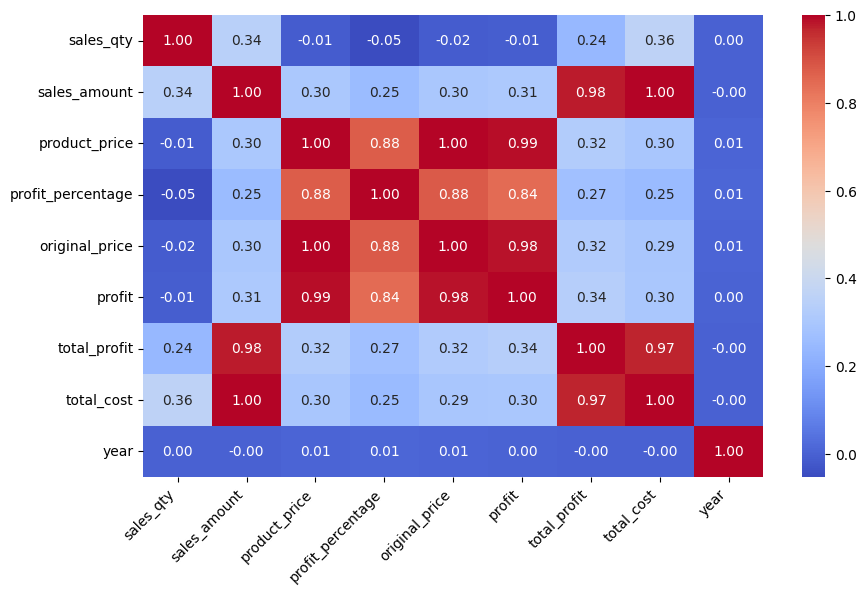

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size (width=10, height=6 in inches)
plt.figure(figsize=(10, 6))

# Create heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")

# Rotate x-axis labels
plt.xticks(rotation=45, ha="right")

# Rotate y-axis labels
plt.yticks(rotation=0)

# Show the plot
plt.show()